
# MTH3302 : Méthodes probabilistes et statistiques pour l'I.A.

Jonathan Jalbert<br/>
Professeur adjoint au Département de mathématiques et de génie industriel<br/>
Polytechnique Montréal<br/>

# Projet : Prédiction des débordements d'égoûts

La description du projet est disponible à l'adresse suivante :
https://www.kaggle.com/t/8b22a09b27944e458e86e7631c0ccfee

Ce calepin Jupyter de base permet de 

1. Charger les données fournies.
2. Effectuer une analyse exploratoire sommaire des données.
3. Développer un modèle simple de prédiction.
4. Générer le fichier de prédictions à téléverser sur Kaggle.

Dans un premier temps, vous devrez récupérer les données sous l'onglet *data* du site Kaggle. Il y a deux fichiers :
- train.csv
- test.csv

Le fichier *train.csv* contient les données sur lesquelles vous pouvez entraîner votre modèle. Il sera ensuite évaluée sur les données de l'ensemble *test.csv* lorsque vous aurez téléversé vos prédictions sur Kaggle. 

### Consignes

- Vous devez constituer une équipe de 3 à 5 personnes.
- Au moins une solution doit être proposée sur Kaggle.
- Utilisez votre numéro d'équipe pour téléverser vos prédictions sur Kaggle.
- Un seul fichier .ipynb par équipe faisant office de rapport et permettant de reproduire vos meilleures prédictions doit être remis.
- Le langage Julia doit être utilisé.
- Votre démarche doit être rigoureusement justifiée (consultez la grille de correction pour vous orienter).

### Quelques conseils

Votre calepin doit permettre de suivre clairement votre raisonnement et de reproduire vos résultats. Garder à l'esprit que vos résultats et votre démarche doivent être reproductibles par une personne à l'extérieur de votre équipe. Le calepin constitue le rapport. Servez vous des cellules de texte pour décrire ce que vous faites.

Je vous encourage fortement à faire une analyse exploratoire de vous données pour développer une meilleure expertise du problème. C'est une étape qui est toujours négligée par les débutants mais qui est essentielle. C'est avec l'analyse exploratoire que vous viendra des idées d'amélioration, par exemple créer de nouvelles variables explicatives.

Vous pouvez utiliser directement tout ce qui se retrouve dans les notes de cours sans explication et toutes les librairies utilisées dans le cours (incluant mes fonctions).

Ce calepin de base contient un modèle très simple de prédiction : on prédit 0 débordement à tous les jours. Ce sera votre travail d'améliorer ces prédictions naïves avec la méthode de votre choix.

Prenez la peine de tout documenter, même les essais infructueux. Ce n'est pas nécessaire de les expliquer en détails, mais c'est important de les mentionner au moins succintement dans la discussion avec une raison possible pour leur échec. De cette façon, une personne qui reprendra votre travail dans le futur ne perdra pas de temps à réessayer une méthode déjà implémentée et infructueuse.

Vous pouvez aussi indiquer dans votre rapport les raisons qui vous font croire pourquoi une méthode à moins bien performée que ce à quoi vous vous attendiez. Vous pouvez également mentionner ce que vous auriez pu tenter si vous aviez eu plus de temps ou plus de données, etc. L'idée est de guider le prochain scientifique qui prendra la relève de votre travail.

Vous êtes limités à deux soumissions par jour par équipe sur Kaggle. Je vous suggère donc de bien tester vos modèles localement et de ne téléverser que vos meilleurs candidats.

In [1]:
using CSV, DataFrames, Gadfly

## 1. Chargement des données

Assurez vous d'avoir télécharger les données dans le répertoire de ce calepin.

In [2]:
data = CSV.read("train.csv", DataFrame)
first(data,5)

,Date,Duration,d15min,d30min,d45min,d1h,d2h,d3h,d4h
,Date…,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2013-06-01,0.0,69.0,100.0,115.0,117.0,117.0,117.0,117.0
2,2013-06-02,0.0,27.0,32.0,33.0,35.0,64.0,96.0,117.0
3,2013-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-06-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2013-06-06,0.0,5.0,7.0,9.0,12.0,19.0,26.0,28.0


## 2. Analyse exploratoire sommaire

C'est une analyse exploratoire sommaire. Je vous encourage formtement à poursuivre cette analyse.

#### 2.1 Surverse vs accumulation de pluie sur 2h

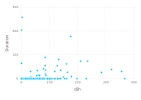

In [3]:
plot(data, x = :d2h, y = :Duration)

#### 2.2 Surverse vs accumulation de pluie sur 2h et 4h

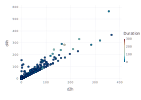

In [4]:
plot(data, x = :d2h, y = :d4h, color = :Duration)

## 3. Prédiction des surverses pour les jours de l'ensemble de test

On utilise un modèle naïf qui prédit qu'il n'y a pas de surverse (durée de surverse = 0 min) pour chacun des jours. C'est à vous d'améliorer ces prédictions.


#### 3.1 Chargement des données de l'ensemble de test

In [5]:
test = CSV.read("test.csv", DataFrame);

#### 3.2 Prédiction de la durée des surverses pour chacun des jours

In [6]:
test[:,:Duration] .= 0.0 ;

#### 3.3 Préparation du fichier des préditions pour téléverser sur Kaggle

Le fichier *benchmark_predictions.csv* généré peut être téléversé sur Kaggle. Il est composé d'une colonne d'identifiants (id) et une colonne des diagnostics prédits.

In [7]:
prediction = select(test, :Date, :Duration)
CSV.write("benchmark_predictions.csv",prediction)

"benchmark_predictions.csv"